In [58]:
%matplotlib inline
from load_data import load_abalone, load_heart_disease
from datetime import datetime
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt


seed = 1
np.random.seed(seed)
test_ratios = np.arange(10) / 20 + 0.05 # from 0.05 to .5 
test_ratio = .2

x, y = load_heart_disease()
x, y = load_abalone()
x_tr, x_te, y_tr, y_te = train_test_split(x, y, test_size=test_ratio, random_state=seed)
split_presets = [train_test_split(x, y, test_size=ratio, random_state=seed) for ratio in test_ratios]
# Other visualization notes: confusion matrix
# 60 20 20 best split
# Consider oversampling/undersampling to balance bias: https://www.datascience.com/blog/imbalanced-data
def r_err(y_te, y_pred): # return error
    return round(1 - accuracy_score(y_te, y_pred), 3)

In [59]:
# Hyperparameters
validation_splits = 3
kf = KFold(n_splits=validation_splits)
print("Train KFold k={}".format(validation_splits))

Train KFold k=3


In [41]:
# Decision Tree: https://scikit-learn.org/stable/modules/tree.html
# Pruning: https://stackoverflow.com/questions/49428469/pruning-decision-trees
from sklearn.tree import DecisionTreeClassifier, export_graphviz
clf = DecisionTreeClassifier(random_state=seed, max_depth=7)
accuracy = cross_val_score(clf, x_tr, y_tr, scoring='accuracy', cv=kf)
print(accuracy.mean()) # Easy graph over number of classes here
time_start = datetime.now()
clf = clf.fit(x_tr, y_tr)
print("Decision tree trained in {}".format(datetime.now() - time_start))
y_pred = clf.predict(x_te)
print(accuracy_score(y_te, y_pred))

0.8263493353937444
Decision tree trained in 0:00:00.012869
0.8325358851674641


In [42]:
dt_hyperparams = {"criterion": ["gini", "entropy"],
                  "max_depth": range(1, 30),
                  "max_leaf_nodes": range(10, 50),
                  "min_weight_fraction": np.arange(20) * 0.01}
dt_results = {}

for key in dt_hyperparams:
    dt_results[key] = []
    dt_results["tr_{}".format(key)] = []

In [76]:
clf = DecisionTreeClassifier(random_state=seed)
for splits in split_presets:
    split_x_tr, split_x_te, split_y_tr, split_y_te = splits
    clf = clf.fit(split_x_tr, split_y_tr)
    y_pred = clf.predict(split_x_te)
    dt_results["tr_size"].append(r_acc(split_y_te, y_pred))
    y_tr_pred = clf.predict(split_x_tr)
    dt_results["tr_tr_size"].append(r_acc(split_y_tr, y_tr_pred))
print(dt_results["tr_size"])

[0.196, 0.227, 0.247, 0.208, 0.221, 0.225, 0.228, 0.224, 0.223, 0.239]


In [44]:
for crit in dt_hyperparams["criterion"]:
    clf = DecisionTreeClassifier(criterion=crit, max_depth=10)
    clf = clf.fit(x_tr, y_tr)
    y_pred = clf.predict(x_te)
    dt_results["criterion"].append(r_acc(y_te, y_pred))
    y_tr_pred = clf.predict(split_x_tr)
    dt_results["tr_criterion"].append(r_acc(split_y_tr, y_tr_pred))
print(dt_results["criterion"])

[0.833, 0.807]


In [45]:
for depth in dt_hyperparams["max_depth"]:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(x_tr, y_tr)
    y_pred = clf.predict(x_te)
    dt_results["max_depth"].append(r_acc(y_te, y_pred))
    y_tr_pred = clf.predict(split_x_tr)
    dt_results["tr_max_depth"].append(r_acc(split_y_tr, y_tr_pred))
print(dt_results["max_depth"])

[0.831, 0.831, 0.836, 0.842, 0.847, 0.841, 0.837, 0.833, 0.829, 0.83, 0.815, 0.805, 0.804, 0.799, 0.788, 0.787, 0.783, 0.793, 0.792, 0.795, 0.785, 0.788, 0.785, 0.779, 0.774, 0.779, 0.786, 0.788, 0.791]


In [46]:
for mln in dt_hyperparams["max_leaf_nodes"]:
    clf = DecisionTreeClassifier(max_depth=10, max_leaf_nodes=mln)
    clf = clf.fit(x_tr, y_tr)
    y_pred = clf.predict(x_te)
    dt_results["max_leaf_nodes"].append(r_acc(y_te, y_pred))
    y_tr_pred = clf.predict(split_x_tr)
    dt_results["tr_max_leaf_nodes"].append(r_acc(split_y_tr, y_tr_pred))
print(dt_results["max_leaf_nodes"])

[0.846, 0.843, 0.843, 0.842, 0.842, 0.842, 0.843, 0.843, 0.843, 0.842, 0.84, 0.841, 0.833, 0.834, 0.833, 0.83, 0.83, 0.83, 0.836, 0.836, 0.837, 0.836, 0.837, 0.837, 0.837, 0.837, 0.837, 0.837, 0.837, 0.837, 0.837, 0.836, 0.836, 0.836, 0.835, 0.835, 0.835, 0.835, 0.834, 0.833]


In [47]:
for frac in dt_hyperparams["min_weight_fraction"]:
    clf = DecisionTreeClassifier(max_depth=10, min_weight_fraction_leaf=frac)
    clf = clf.fit(x_tr, y_tr)
    y_pred = clf.predict(x_te)
    dt_results["min_weight_fraction"].append(r_acc(y_te, y_pred))
    y_tr_pred = clf.predict(split_x_tr)
    dt_results["tr_min_weight_fraction"].append(r_acc(split_y_tr, y_tr_pred))
print(dt_results["min_weight_fraction"])

[0.83, 0.839, 0.834, 0.83, 0.836, 0.836, 0.831, 0.831, 0.831, 0.831, 0.831, 0.831, 0.831, 0.831, 0.831, 0.831, 0.831, 0.831, 0.831, 0.831]


In [48]:
import graphviz 
dot_data = export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("abalone") 
graph.view()

'abalone.pdf.pdf'

In [60]:
# Neural Net: https://scikit-learn.org/stable/modules/neural_networks_supervised.html
# Sample sanity run
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-3,
                     hidden_layer_sizes=(10, 10), random_state=seed)
accuracy = cross_val_score(clf, x_tr, y_tr, scoring='accuracy', cv=kf)
print(accuracy.mean()) # Easy graph over number of classes here
time_start = datetime.now()
clf = clf.fit(x_tr, y_tr)
print("Neural net trained in {}".format(datetime.now() - time_start))
y_pred = clf.predict(x_te)
print(accuracy_score(y_te, y_pred))

0.8389252633180685
Neural net trained in 0:00:00.766695
0.8480861244019139


In [61]:
# Neural net hyperparams
from sklearn.utils.extmath import cartesian
net_hyperparams = {"activation": ['identity','relu', 'logistic', 'tanh'],
               "epochs": np.arange(200) + 1, # iterations - when testing iterations set tol to 1e-8 or something
               "arch1": [()] + [(i) for i in (np.arange(100) + 1)],
               "arch2": cartesian((np.arange(1, 21), np.arange(1, 21))), # 2d plane search - reshape 20x20x2 for graph
               "arch3": [[10] * i for i in range(3, 10)], # Deeper architectures with 10 per layer
               "alpha": (np.arange(100) + 1) * 1e-5} # 1e-5 -> 1e-3
# Base params: relu, max_iter: 200 (==> convergence), lbfgs (good for smaller datasets), standard alpha
net_results = {}

for key in net_hyperparams:
    net_results[key] = []
    net_results["tr_{}".format(key)] = []

In [73]:
clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(10, 10), random_state=seed)
for splits in split_presets:
    split_x_tr, split_x_te, split_y_tr, split_y_te = splits
    clf = clf.fit(split_x_tr, split_y_tr)
    y_pred = clf.predict(split_x_te)
    net_results["tr_size"].append(r_acc(split_y_te, y_pred))
    y_tr_pred = clf.predict(split_x_tr)
    net_results["tr_tr_size"].append(r_acc(split_y_tr, y_tr_pred))
print(net_results["tr_size"])


[0.167, 0.175, 0.159, 0.15, 0.149, 0.156, 0.157, 0.157, 0.156, 0.156]


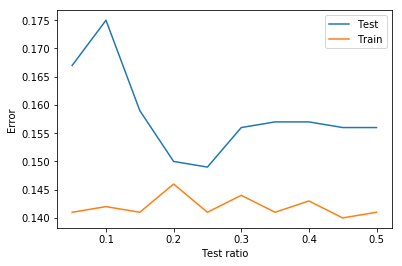

In [75]:
plt.plot(test_ratios, net_results["tr_size"], label="Test")
plt.plot(test_ratios, net_results["tr_tr_size"], label="Train")
plt.legend()
plt.ylabel("Error")
plt.xlabel("Test ratio")
plt.savefig("net_tr_size.png")

In [ ]:
for act in net_hyperparams["activation"]:
    clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(10, 10), activation=act, random_state=seed)
    clf = clf.fit(x_tr, y_tr)
    y_pred = clf.predict(x_te)
    net_results["activation"].append(r_acc(y_te, y_pred))
    y_tr_pred = clf.predict(split_x_tr)
    net_results["tr_activation"].append(r_acc(split_y_tr, y_tr_pred))
print(net_results["activation"])


In [63]:
plt.plot(np.arange(len(net_hyperparams["activation"])), net_results["activation"])

KeyError: 'activation'

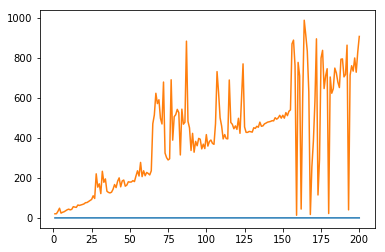

In [55]:
net_results["epochs_time"] = []
for ep in net_hyperparams["epochs"]:
    clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(10, 10), max_iter=ep, tol=1e-10, random_state=seed)
    time_start = datetime.now()
    clf = clf.fit(x_tr, y_tr)
    time_elapsed = (datetime.now() - time_start).microseconds
    y_pred = clf.predict(x_te)    
    net_results["epochs"].append(r_acc(y_te, y_pred))
    net_results["epochs_time"].append(round(time_elapsed, 3))
    y_tr_pred = clf.predict(split_x_tr)
    net_results["tr_epochs"].append(r_acc(split_y_tr, y_tr_pred))
net_results["epochs_time"] = np.asarray(net_results["epochs_time"]) * 1e-3 # Microseconds -> ms

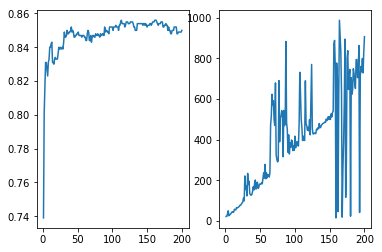

In [56]:
fig, axes = plt.subplots(1, 2)
axes[0].plot(net_hyperparams["epochs"], net_results["epochs"])
axes[1].plot(net_hyperparams["epochs"], net_results["epochs_time"])


In [31]:
for a in net_hyperparams["alpha"]:
    clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(10, 10), alpha=a, random_state=seed)
    clf = clf.fit(x_tr, y_tr)
    y_pred = clf.predict(x_te)
    net_results["alpha"].append(r_acc(y_te, y_pred))
    y_tr_pred = clf.predict(split_x_tr)
    net_results["tr_alpha"].append(r_acc(split_y_tr, y_tr_pred))
print(net_results["alpha"])

{'alpha': [0.7868852459016393, 0.7868852459016393, 0.7704918032786885, 0.8032786885245902, 0.8032786885245902, 0.8032786885245902, 0.8032786885245902, 0.8032786885245902, 0.7868852459016393, 0.7868852459016393, 0.8032786885245902, 0.8032786885245902, 0.819672131147541, 0.819672131147541, 0.7868852459016393, 0.819672131147541, 0.7868852459016393, 0.7868852459016393, 0.7868852459016393, 0.7704918032786885, 0.7868852459016393, 0.7868852459016393, 0.7868852459016393, 0.7868852459016393, 0.7868852459016393, 0.7868852459016393, 0.8032786885245902, 0.7868852459016393, 0.8032786885245902, 0.8032786885245902, 0.819672131147541, 0.8032786885245902, 0.8032786885245902, 0.819672131147541, 0.819672131147541, 0.819672131147541, 0.8360655737704918, 0.819672131147541, 0.8360655737704918, 0.819672131147541, 0.8360655737704918, 0.819672131147541, 0.819672131147541, 0.819672131147541, 0.819672131147541, 0.819672131147541, 0.819672131147541, 0.819672131147541, 0.8360655737704918, 0.819672131147541, 0.8196

In [48]:
arches = ["arch1", "arch2", "arch3"]
for arch_name in arches:
    for arch in net_hyperparams[arch_name]:
        clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=arch, random_state=seed)
        clf = clf.fit(x_tr, y_tr)
        y_pred = clf.predict(x_te)
        net_results[arch_name].append(r_acc(y_te, y_pred))
        y_tr_pred = clf.predict(split_x_tr)
        net_results["tr_{}".format(arch_name)].append(r_acc(split_y_tr, y_tr_pred))

print(net_results["arch1"], net_results["arch2"], net_results["arch3"])

{'arch2': [0.82, 0.82, 0.836, 0.869, 0.803, 0.82, 0.836, 0.852, 0.82, 0.836, 0.836, 0.836, 0.852, 0.836, 0.803, 0.869, 0.82, 0.836, 0.82, 0.852, 0.787, 0.787, 0.82, 0.803, 0.803, 0.852, 0.82, 0.803, 0.836, 0.803, 0.82, 0.787, 0.787, 0.754, 0.787, 0.803, 0.82, 0.82, 0.787, 0.82, 0.59, 0.82, 0.82, 0.82, 0.82, 0.787, 0.803, 0.803, 0.738, 0.77, 0.738, 0.738, 0.754, 0.77, 0.803, 0.721, 0.82, 0.787, 0.738, 0.754, 0.721, 0.77, 0.803, 0.77, 0.787, 0.787, 0.77, 0.787, 0.787, 0.689, 0.754, 0.672, 0.705, 0.787, 0.689, 0.803, 0.738, 0.836, 0.738, 0.738, 0.59, 0.77, 0.738, 0.738, 0.754, 0.77, 0.721, 0.721, 0.82, 0.803, 0.836, 0.721, 0.787, 0.77, 0.738, 0.82, 0.82, 0.77, 0.754, 0.738, 0.59, 0.836, 0.754, 0.754, 0.787, 0.754, 0.721, 0.754, 0.705, 0.721, 0.705, 0.672, 0.836, 0.754, 0.754, 0.82, 0.803, 0.77, 0.738, 0.77, 0.787, 0.754, 0.672, 0.787, 0.82, 0.787, 0.705, 0.803, 0.672, 0.754, 0.77, 0.82, 0.738, 0.672, 0.787, 0.77, 0.787, 0.738, 0.787, 0.738, 0.803, 0.754, 0.738, 0.787, 0.754, 0.738, 0.836,

In [6]:
# Boosting (Adaboost): https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1, random_state=seed), random_state=seed)

accuracy = cross_val_score(clf, x_tr, y_tr, scoring='accuracy', cv=kf)
print(accuracy.mean()) # Easy graph over number of classes here
time_start = datetime.now()
clf = clf.fit(x_tr, y_tr)
print("AdaBoosted classifier trained in {}".format(datetime.now() - time_start))
y_pred = clf.predict(x_te)
y_pred = clf.predict(x_te)
print(accuracy_score(y_te, y_pred))


0.8135288065843621
AdaBoosted classifier trained in 0:00:00.053851
0.6721311475409836


In [7]:
from sklearn.linear_model import SGDClassifier
base_classifiers = [DecisionTreeClassifier(max_depth=1, random_state=seed), 
                    SGDClassifier(loss='log', random_state=seed),
                    SGDClassifier(loss='hinge', random_state=seed)]
ada_hyperparams = {"base": base_classifiers,
                   "n": np.arange(1, 51),
                   "max_depth": np.arange(1,5)} # for decision tree
ada_results = {}
for key in ada_hyperparams:
    ada_results[key] = []
    ada_results["tr_{}".format(key)] = []

In [8]:
clf = AdaBoostClassifier(random_state=seed)
for splits in split_presets:
    split_x_tr, split_x_te, split_y_tr, split_y_te = splits
    clf = clf.fit(split_x_tr, split_y_tr)
    y_pred = clf.predict(split_x_te)
    ada_results["tr_size"].append(r_acc(split_y_te, y_pred))
    y_tr_pred = clf.predict(split_x_tr)
    ada_results["tr_tr_size"].append(r_acc(split_y_tr, y_tr_pred))
print(ada_results["tr_size"])

[0.562, 0.645, 0.739, 0.672, 0.684, 0.747, 0.717, 0.769, 0.721, 0.742]


In [ ]:
plt.plot(test_ratios, net_results["tr_size"])
plt.xlabel("Test set size")
plt.savefig("ada_tr_size.png")

In [11]:
for base in ada_hyperparams["base"]:
    clf = AdaBoostClassifier(base, random_state=seed, algorithm='SAMME')
    clf = clf.fit(x_tr, y_tr)
    y_pred = clf.predict(x_te)
    ada_results["base"].append(r_acc(y_te, y_pred))
    y_tr_pred = clf.predict(split_x_tr)
    ada_results["tr_base"].append(r_acc(split_y_tr, y_tr_pred))
print(ada_results["base"])

[0.738, 0.754, 0.754]


/home/joel/anaconda2/envs/pyEnv/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/joel/anaconda2/envs/pyEnv/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning

In [12]:
for n in ada_hyperparams["n"]:
    clf = AdaBoostClassifier(random_state=seed, n_estimators=n)
    clf = clf.fit(x_tr, y_tr)
    y_pred = clf.predict(x_te)
    ada_results["n"].append(r_acc(y_te, y_pred))
    y_tr_pred = clf.predict(split_x_tr)
    ada_results["tr_n"].append(r_acc(split_y_tr, y_tr_pred))
print(ada_results["n"])

[0.705, 0.689, 0.689, 0.689, 0.689, 0.705, 0.705, 0.721, 0.705, 0.689, 0.672, 0.672, 0.672, 0.689, 0.689, 0.689, 0.689, 0.689, 0.689, 0.689, 0.689, 0.689, 0.689, 0.689, 0.672, 0.672, 0.672, 0.672, 0.672, 0.672, 0.672, 0.672, 0.672, 0.672, 0.672, 0.672, 0.672, 0.672, 0.689, 0.689, 0.689, 0.689, 0.705, 0.689, 0.672, 0.705, 0.705, 0.672, 0.672, 0.672]


In [13]:
for depth in ada_hyperparams["max_depth"]:
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=depth),random_state=seed)
    clf = clf.fit(x_tr, y_tr)
    y_pred = clf.predict(x_te)
    ada_results["max_depth"].append(r_acc(y_te, y_pred))
    y_tr_pred = clf.predict(split_x_tr)
    ada_results["tr_max_depth"].append(r_acc(split_y_tr, y_tr_pred))
print(ada_results["max_depth"])

[0.672, 0.639, 0.656, 0.705]


In [67]:
# SVM: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn.svm import SVC
clf = SVC(C=1.0,kernel='rbf',random_state=seed)

accuracy = cross_val_score(clf, x_tr, y_tr, scoring='accuracy', cv=kf)
print(accuracy.mean()) # Easy graph over number of classes here
time_start = datetime.now()
clf = clf.fit(x_tr, y_tr)
print("SVC trained in {}".format(datetime.now() - time_start))
y_pred = clf.predict(x_te)
y_pred = clf.predict(x_te)
print(accuracy_score(y_te, y_pred))

0.8341563786008231
SVC trained in 0:00:00.002588
0.7377049180327869


In [72]:
svm_hyperparams = {"C": np.exp(np.arange(11)-5), # https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html
                   "kernel": ["linear", "poly", "sigmoid", "rbf"],
                   "gamma": np.exp(np.arange(11)-5), # https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html
                   "max_iter": np.arange(100) + 1,
                   }
svm_results = {}
for key in svm_hyperparams:
    svm_results[key] = []
    svm_results["tr_{}".format(key)] = []

In [73]:
clf = SVC()
for splits in split_presets:
    split_x_tr, split_x_te, split_y_tr, split_y_te = splits
    clf = clf.fit(split_x_tr, split_y_tr)
    y_pred = clf.predict(split_x_te)
    svm_results["tr_size"].append(r_acc(split_y_te, y_pred))
    y_tr_pred = clf.predict(split_x_tr)
    svm_results["tr_tr_size"].append(r_acc(split_y_tr, y_tr_pred))
print(svm_results["tr_size"])

[0.562, 0.677, 0.717, 0.738, 0.737, 0.78, 0.811, 0.826, 0.794, 0.788]


In [ ]:
plt.plot(test_ratios, svm_results["tr_size"])
plt.xlabel("Test set size")
plt.savefig("svm_tr_size.png")

In [74]:
for C in svm_hyperparams["C"]:
    clf = SVC(C=C)
    clf = clf.fit(x_tr, y_tr)
    y_pred = clf.predict(x_te)
    svm_results["C"].append(r_acc(y_te, y_pred))
    y_tr_pred = clf.predict(split_x_tr)
    svm_results["tr_C"].append(r_acc(split_y_tr, y_tr_pred))
print(svm_results["C"])

[0.59, 0.59, 0.59, 0.59, 0.754, 0.738, 0.721, 0.705, 0.705, 0.705, 0.705]


In [75]:
for ker in svm_hyperparams["kernel"]:
    clf = SVC(kernel=ker)
    clf = clf.fit(x_tr, y_tr)
    y_pred = clf.predict(x_te)
    svm_results["kernel"].append(r_acc(y_te, y_pred))
    y_tr_pred = clf.predict(split_x_tr)
    svm_results["tr_kernel"].append(r_acc(split_y_tr, y_tr_pred))
print(svm_results["kernel"])

[0.803, 0.689, 0.787, 0.738]


In [77]:
for gamma in svm_hyperparams["gamma"]:
    clf = SVC(gamma=gamma)
    clf = clf.fit(x_tr, y_tr)
    y_pred = clf.predict(x_te)
    svm_results["gamma"].append(r_acc(y_te, y_pred))
    y_tr_pred = clf.predict(split_x_tr)
    svm_results["tr_kernel"].append(r_acc(split_y_tr, y_tr_pred))
print(svm_results["gamma"])

[0.77, 0.77, 0.77, 0.721, 0.623, 0.59, 0.59, 0.59, 0.59, 0.59, 0.59]


In [78]:
"""This is pretty hard to interpet --> ignore"""
for max_iter in svm_hyperparams["max_iter"]:
    clf = SVC(max_iter=max_iter)
    clf = clf.fit(x_tr, y_tr)
    y_pred = clf.predict(x_te)
    svm_results["max_iter"].append(r_acc(y_te, y_pred))
    y_tr_pred = clf.predict(split_x_tr)
    svm_results["tr_max_iter"].append(r_acc(split_y_tr, y_tr_pred))
print(svm_results["max_iter"])

/home/joel/anaconda2/envs/pyEnv/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/joel/anaconda2/envs/pyEnv/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/joel/anaconda2/envs/pyEnv/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/joel/anaconda2/envs/pyEnv/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=4).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, Conv

[0.689, 0.59, 0.59, 0.59, 0.672, 0.689, 0.672, 0.689, 0.689, 0.689, 0.721, 0.689, 0.689, 0.672, 0.721, 0.803, 0.787, 0.721, 0.787, 0.77, 0.803, 0.738, 0.738, 0.738, 0.721, 0.787, 0.77, 0.803, 0.77, 0.77, 0.77, 0.738, 0.787, 0.77, 0.754, 0.754, 0.787, 0.803, 0.836, 0.787, 0.754, 0.754, 0.787, 0.787, 0.77, 0.77, 0.77, 0.77, 0.754, 0.754, 0.787, 0.787, 0.77, 0.787, 0.754, 0.754, 0.738, 0.738, 0.738, 0.738, 0.738, 0.738, 0.738, 0.738, 0.738, 0.754, 0.754, 0.754, 0.754, 0.754, 0.754, 0.738, 0.738, 0.738, 0.738, 0.738, 0.738, 0.738, 0.738, 0.738, 0.738, 0.738, 0.738, 0.738, 0.738, 0.738, 0.738, 0.738, 0.738, 0.738, 0.738, 0.738, 0.738, 0.738, 0.738, 0.738, 0.738, 0.738, 0.738, 0.738]


/home/joel/anaconda2/envs/pyEnv/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=74).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/joel/anaconda2/envs/pyEnv/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=75).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/joel/anaconda2/envs/pyEnv/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=76).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/joel/anaconda2/envs/pyEnv/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=77).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, 

In [55]:
# KNN: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()

accuracy = cross_val_score(clf, x_tr, y_tr, scoring='accuracy', cv=kf)
print(accuracy.mean()) # Easy graph over number of classes here
time_start = datetime.now()
clf = clf.fit(x_tr, y_tr)
print("KNN trained in {}".format(datetime.now() - time_start))
y_pred = clf.predict(x_te)
y_pred = clf.predict(x_te)
print(accuracy_score(y_te, y_pred))

0.8133230452674898
SVC trained in 0:00:00.001325
0.7704918032786885


In [58]:
# KNN Hyperparams
knn_hyperparams = {"k": np.arange(10) + 1,
                   "weighting": ['uniform', 'distance'],
                   "p": np.arange(10) + 1}
# Base params: relu, max_iter: 200 (==> convergence), lbfgs (good for smaller datasets), standard alpha
knn_results = {}
for key in knn_hyperparams:
    knn_results[key] = []
    knn_results["tr_{}".format(key)] = []

In [59]:
clf = KNeighborsClassifier()
for splits in split_presets:
    split_x_tr, split_x_te, split_y_tr, split_y_te = splits
    clf = clf.fit(split_x_tr, split_y_tr)
    y_pred = clf.predict(split_x_te)
    knn_results["tr_size"].append(r_acc(split_y_te, y_pred))
    y_tr_pred = clf.predict(split_x_tr)
    knn_results["tr_tr_size"].append(r_acc(split_y_tr, y_tr_pred))
print(knn_results["tr_size"])

[0.75, 0.774, 0.761, 0.77, 0.776, 0.769, 0.802, 0.826, 0.794, 0.788]


In [61]:
for k in knn_hyperparams["k"]:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf = clf.fit(x_tr, y_tr)
    y_pred = clf.predict(x_te)
    knn_results["k"].append(r_acc(y_te, y_pred))
    y_tr_pred = clf.predict(split_x_tr)
    knn_results["tr_k"].append(r_acc(split_y_tr, y_tr_pred))
print(knn_results["k"])

[0.705, 0.689, 0.738, 0.672, 0.77, 0.672, 0.721, 0.689, 0.738, 0.705]


In [63]:
for weighting in knn_hyperparams["weighting"]:
    clf = KNeighborsClassifier(weights=weighting)
    clf = clf.fit(x_tr, y_tr)
    y_pred = clf.predict(x_te)
    knn_results["weighting"].append(r_acc(y_te, y_pred))
    y_tr_pred = clf.predict(split_x_tr)
    knn_results["tr_weighting"].append(r_acc(split_y_tr, y_tr_pred))
print(knn_results["weighting"]) # Presumably due to dimensionality -> space too sparse

[0.77, 0.77]


In [62]:
for p in knn_hyperparams["p"]:
    clf = KNeighborsClassifier(p=p)
    clf = clf.fit(x_tr, y_tr)
    y_pred = clf.predict(x_te)
    knn_results["p"].append(r_acc(y_te, y_pred))
    y_tr_pred = clf.predict(split_x_tr)
    knn_results["tr_p"].append(r_acc(split_y_tr, y_tr_pred))
print(knn_results["p"])

[0.721, 0.77, 0.77, 0.754, 0.754, 0.77, 0.77, 0.787, 0.787, 0.787]
